Dataset from: https://www.kaggle.com/datasets/korpionn/credit-classification-dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
dataframe=pd.read_csv("credit score.csv")
dataframe.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


**Since the dataset had every person's 8 months of data seperatley i grouped it using Customer_ID as below

In [39]:
dataframe=dataframe.groupby("Customer_ID").agg({
    "Annual_Income": "mean",
    "Monthly_Inhand_Salary": "mean",
    "Total_EMI_per_month": "sum",
    "Amount_invested_monthly": "mean",
    "Monthly_Balance": "mean",
    "Num_Bank_Accounts": "mean",
    "Num_Credit_Card": "mean",
    "Num_of_Loan": "mean",
    "Outstanding_Debt": "mean",
    "Credit_Utilization_Ratio": "mean",
    "Num_of_Delayed_Payment": "sum",
    "Delay_from_due_date": "mean",
    "Num_Credit_Inquiries": "sum",
    "Changed_Credit_Limit": "mean",
    "Credit_History_Age": "mean",
    "Payment_of_Min_Amount": lambda x: x.mode()[0],  # Most frequent value
    "Payment_Behaviour": lambda x: x.mode()[0],  # Most frequent value
    "Credit_Score": lambda x: x.mode()[0],  # Keep the most frequent credit score
}).reset_index()
dataframe.head(30)

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Outstanding_Debt,Credit_Utilization_Ratio,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Changed_Credit_Limit,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,1006,16756.180,1331.348333,219.536713,45.301068,314.626667,9.00,6.00,2.0,1941.73,31.727384,94.0,48.000,64.0,10.660,185.500,Yes,Low_spent_Small_value_payments,Poor
1,1007,21212.910,1496.742500,365.965603,30.373472,285.607087,3.00,4.00,3.0,993.15,36.313739,155.0,18.625,8.0,5.630,349.500,No,Low_spent_Small_value_payments,Standard
2,1008,33540.430,2655.035833,0.000000,50.930150,362.407369,6.00,3.00,0.0,1138.97,28.688272,90.0,25.625,76.0,14.110,295.500,Yes,High_spent_Small_value_payments,Standard
3,1009,80983.640,6692.636667,1507.652762,101.120201,523.000149,6.00,3.00,4.0,982.44,34.677793,146.0,19.000,56.0,17.285,334.500,Yes,High_spent_Medium_value_payments,Standard
4,1011,104142.560,8433.546667,2061.909168,102.488034,445.787831,3.00,5.00,3.0,1371.80,33.611631,117.0,18.750,48.0,15.780,182.500,Yes,Low_spent_Medium_value_payments,Standard
5,1013,30022.710,2684.892500,497.778282,53.342282,356.811815,3.00,7.00,4.0,1071.33,33.417176,19.0,9.750,8.0,2.935,314.500,No,Low_spent_Large_value_payments,Standard
6,1014,60244.720,5197.393333,845.299830,49.065258,458.586852,6.00,6.00,3.0,989.42,34.782720,141.0,29.000,15.0,7.155,269.500,No,High_spent_Medium_value_payments,Good
7,1015,26104.480,1995.373333,697.759604,27.566185,268.795818,4.00,4.00,7.0,377.32,34.172150,115.0,11.250,69.0,10.010,78.625,Yes,High_spent_Medium_value_payments,Standard
8,1017,18060.640,1280.053333,241.785833,19.978290,293.417510,8.00,7.00,3.0,1384.96,30.045661,194.0,29.000,56.0,3.130,209.500,Yes,Low_spent_Small_value_payments,Poor
9,1019,14432.870,1185.739167,51.296952,30.788487,299.294272,3.00,7.00,1.0,941.79,31.209441,63.0,5.125,24.0,10.345,391.500,No,Low_spent_Small_value_payments,Good


In [40]:
dataframe.describe()

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Outstanding_Debt,Credit_Utilization_Ratio,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Changed_Credit_Limit,Credit_History_Age
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000
mean,25982.666640,50505.123449,4197.270835,861.593663,55.101315,392.697586,5.368820,5.533570,3.532880,1426.220376,32.285173,106.504960,21.081410,46.386000,10.470323,221.220460
std,14341.045002,38300.762656,3186.154633,955.809530,39.008298,157.262416,2.592517,2.066042,2.446442,1155.169458,2.060556,49.106357,14.721097,29.718414,6.403917,99.658261
min,1006.000000,7005.930000,303.645417,0.000000,0.000000,74.832080,0.000000,0.500000,0.000000,0.230000,25.476634,0.000000,0.000000,0.000000,0.500000,4.500000
25%,13664.500000,19342.972500,1625.744479,242.450570,27.959111,283.551237,3.000000,4.000000,2.000000,566.072500,30.854492,72.000000,9.875000,24.000000,5.633750,144.500000
50%,25777.000000,36999.705000,3096.922500,544.690244,45.156550,336.427394,5.375000,5.000000,3.000000,1166.155000,32.241830,110.000000,17.875000,42.000000,9.370000,218.500000
75%,38385.000000,71683.470000,5961.664375,1207.349440,71.295797,457.357566,7.000000,7.000000,5.000000,1945.962500,33.600168,146.000000,28.000000,68.000000,14.660000,301.500000
max,50999.000000,179987.280000,15204.633333,12121.271889,434.191089,1183.930696,10.500000,10.875000,9.000000,4998.070000,42.395301,200.000000,62.000000,131.000000,29.980000,400.500000


**Payment_of_Min_Amount, Payment_Behaviour and Credit_Score are in string format so i maped the string outputs of those in to integers as below**

In [41]:
dataframe["Payment_of_Min_Amount"]=dataframe["Payment_of_Min_Amount"].map({
    "No":0,
    "Yes":1
})

In [42]:
dataframe["Payment_Behaviour"]=dataframe["Payment_Behaviour"].map(
    {
        "High_spent_Small_value_payments":0,
        "High_spent_Medium_value_payments":1,
        "High_spent_Large_value_payments":2,
        "Low_spent_Small_value_payments":3}
)

In [43]:
dataframe["Credit_Score"]=dataframe["Credit_Score"].map({"Good":1,"Standard":0,"Poor":0})
dataframe

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Outstanding_Debt,Credit_Utilization_Ratio,Num_of_Delayed_Payment,Delay_from_due_date,Num_Credit_Inquiries,Changed_Credit_Limit,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,1006,16756.18,1331.348333,219.536713,45.301068,314.626667,9.0,6.0,2.0,1941.73,31.727384,94.0,48.000,64.0,10.660,185.5,1.0,3.0,0
1,1007,21212.91,1496.742500,365.965603,30.373472,285.607087,3.0,4.0,3.0,993.15,36.313739,155.0,18.625,8.0,5.630,349.5,0.0,3.0,0
2,1008,33540.43,2655.035833,0.000000,50.930150,362.407369,6.0,3.0,0.0,1138.97,28.688272,90.0,25.625,76.0,14.110,295.5,1.0,0.0,0
3,1009,80983.64,6692.636667,1507.652762,101.120201,523.000149,6.0,3.0,4.0,982.44,34.677793,146.0,19.000,56.0,17.285,334.5,1.0,1.0,0
4,1011,104142.56,8433.546667,2061.909168,102.488034,445.787831,3.0,5.0,3.0,1371.80,33.611631,117.0,18.750,48.0,15.780,182.5,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,50984,19267.17,1531.597500,621.047493,47.873509,243.078626,6.0,5.0,6.0,1732.19,33.146084,99.0,13.500,96.0,14.460,160.5,1.0,3.0,0
12496,50990,32125.54,2559.128333,474.647377,34.883593,346.253954,7.0,9.0,3.0,2557.14,33.803676,129.0,11.500,74.0,6.820,73.5,1.0,2.0,0
12497,50992,9608.03,735.669167,203.743988,0.000000,292.062452,7.0,4.0,6.0,1494.17,33.800824,91.0,8.250,40.0,10.315,162.5,1.0,3.0,0
12498,50996,27305.93,2289.494167,0.000000,26.378439,414.800603,3.0,4.0,0.0,454.40,33.212401,135.0,21.625,48.0,8.930,209.5,1.0,1.0,0


In [44]:
dataframe.dtypes

,0
Customer_ID,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Total_EMI_per_month,float64
Amount_invested_monthly,float64
Monthly_Balance,float64
Num_Bank_Accounts,float64
Num_Credit_Card,float64
Num_of_Loan,float64
Outstanding_Debt,float64


**Calculated the number of missing values (NaN or null values)**

In [45]:
dataframe.isnull().sum() #count the number of missing values (NaN or null values)

,0
Customer_ID,0
Annual_Income,0
Monthly_Inhand_Salary,0
Total_EMI_per_month,0
Amount_invested_monthly,0
Monthly_Balance,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Num_of_Loan,0
Outstanding_Debt,0


**Payment_of_Min_Amount	and Payment_Behaviour are having Nan values. So i filled it with most frequent values of those particular coulmns**

In [46]:
dataframe['Payment_of_Min_Amount'].fillna(dataframe['Payment_of_Min_Amount'].mode()[0], inplace=True)
dataframe['Payment_Behaviour'].fillna(dataframe['Payment_Behaviour'].mode()[0], inplace=True)


<ipython-input-46-512321625d4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Payment_of_Min_Amount'].fillna(dataframe['Payment_of_Min_Amount'].mode()[0], inplace=True)
<ipython-input-46-512321625d4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [47]:
dataframe.columns

Index(['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Num_of_Delayed_Payment', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Changed_Credit_Limit', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [48]:
X=dataframe.drop("Credit_Score",axis=1)
y=dataframe["Credit_Score"]

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [51]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}   #parameter grid for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # Created the GridSearchCV object
grid_search.fit(x_train, y_train)   #Fit GridSearchCV on the training data
best_model = grid_search.best_estimator_   # Use the best model found by GridSearchCV
y_pred = best_model.predict(x_test)
print(grid_search.best_params_)

{'C': 1}


In [52]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [53]:
predictions=pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_pred})
predictions

,Actual_data,Predicted_data
8400,1,0
8546,0,0
8243,1,1
809,1,1
970,0,0
...,...,...
10218,0,0
11856,0,0
973,0,0
4857,0,0


In [54]:
from sklearn.metrics import accuracy_score

# Example: y_test contains actual labels, y_pred contains predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.84


In [55]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2500
           1       0.63      0.51      0.56       625

    accuracy                           0.84      3125
   macro avg       0.76      0.72      0.73      3125
weighted avg       0.83      0.84      0.84      3125



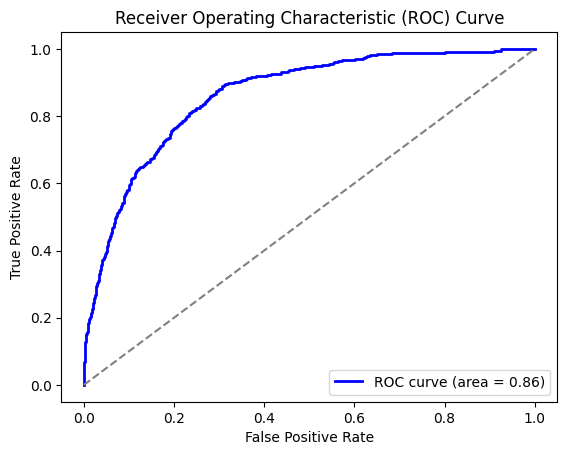

In [59]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_model.predict_proba(x_test)[:, 1]  # Probability for class 1  # i did hyper parameter tuning and got best model and wanted to do ROC curve on predictions

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
